# PCA Analysis on the data collected and preprocessed

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

In [327]:
X = pd.read_csv("./output/batchTot_geno.txt", sep='\t', index_col=0, dtype=float)
y = pd.read_csv("./output/batchTot_pheno.txt", sep='\t', index_col=0, dtype=str, usecols=[0, 1, 3])
#print(X.head())
#print(y)

In [329]:
y['batches'] = y['batch'].apply(lambda x: 0 if x=='batch1' else (1 if x=='batch2' else (2 if x=='batch3' else (3 if x=='batch4' else None))))
y['Cbmi'] = y['cbmi'].apply(lambda x: 0 if x=='lean' else (1 if x=='obese' else None))
Z = X.T.merge(y[['batches', 'Cbmi']], left_index=True, right_index=True, how='inner')

print(Z.head())
with open("./output/Ztot.txt", "w") as handle:
    Z.to_csv(handle, sep='\t')

samples = list(Z.index)
genes_ids = list(Z.columns)
batches = np.array(Z['batches'])
cbmi = np.array(Z['Cbmi'])
print(cbmi)
Z.drop(Z.loc[:,'batches':'Cbmi'].head(0).columns, axis=1, inplace = True)
Z = np.array(Z)

                 1.0       10.0      100.0     1000.0    10000.0  100009676.0  \
samples                                                                         
Lean F 01 -14.498237 -17.394503 -15.567706 -16.788951 -17.188502   -16.031785   
Lean F 02 -15.087327 -19.095387 -15.657845 -17.018402 -16.424505   -16.346427   
Lean F 03 -15.774552 -18.639743 -15.485248 -17.646776 -16.124607   -16.138274   
Lean F 04 -14.826623 -18.566498 -15.885121 -16.293205 -16.369392   -16.771676   
Lean F 05 -14.513295 -18.606968 -15.967244 -16.801863 -16.556843   -17.231486   

             10001.0    10002.0    10003.0    10004.0  ...      9989.0  \
samples                                                ...               
Lean F 01 -15.489873 -15.515150 -17.292039 -15.546980  ...  -16.328314   
Lean F 02 -15.404119 -15.984402 -18.298569 -15.404575  ...  -16.083303   
Lean F 03 -15.735407 -15.480233 -17.676421 -15.517640  ...  -16.498884   
Lean F 04 -15.517890 -16.001900 -16.279368 -15.225323  ...  -1

In [319]:
centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

In [320]:
plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(Z)
pca_score = pca.explained_variance_ratio_
print(pca_score)
print(pca.components_)
#Z = pca.transform(Z)
#print(Z)

[ 0.65207826  0.17487028  0.07172371]
[[ -1.21706400e-02  -5.12524547e-04   7.21745036e-05 ...,  -9.46338490e-03
    2.73812042e-03   5.08579756e-03]
 [  1.50090564e-03   1.26821430e-02   5.54203001e-03 ...,   1.87430296e-03
    6.24653026e-03   1.75744420e-02]
 [  3.00884043e-03  -1.00815931e-02   7.82288634e-03 ...,   1.96222070e-04
    8.66062559e-03  -8.83868221e-03]]


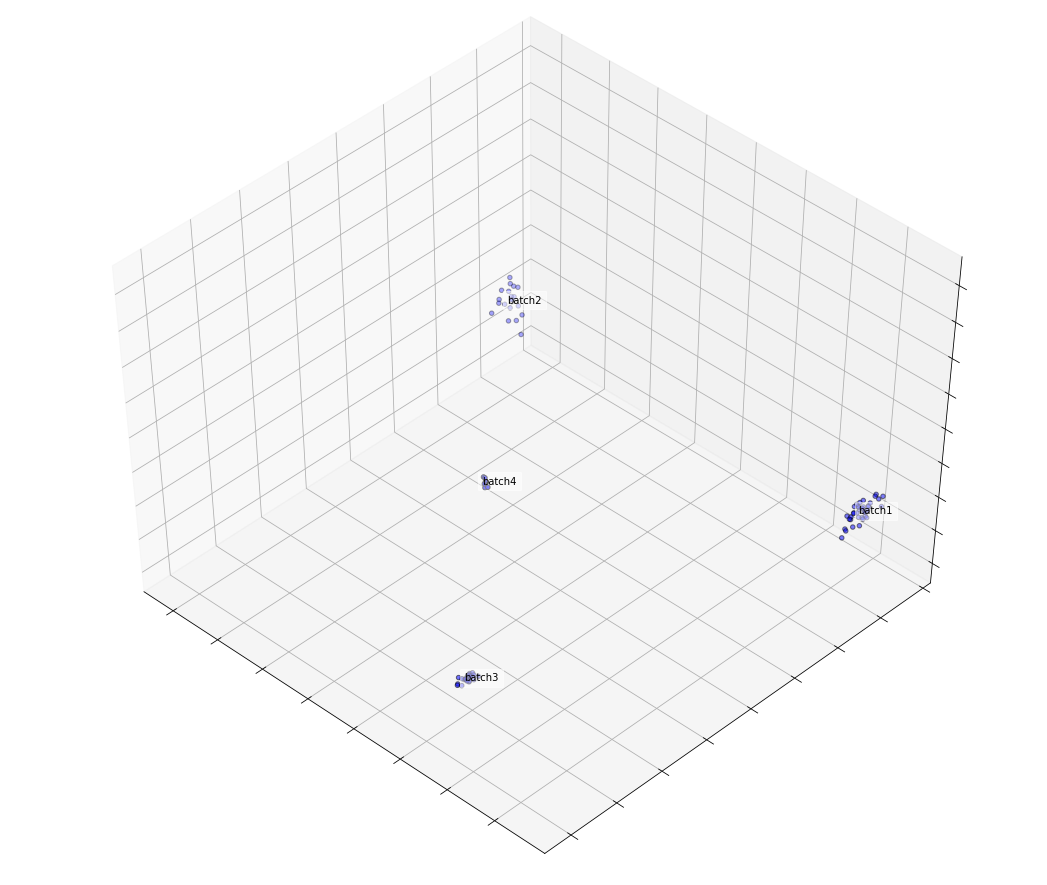

In [325]:
fig = plt.figure(1, figsize=(15, 12))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(Z)
X = pca.transform(Z)

c = ['b', 'c', 'y', 'm']


for name, label in [('batch1', 0), ('batch2', 1), ('batch3', 2), ('batch4', 3)]:
    ax.text3D(X[batches == np.int64(label), 0].mean(),
              X[batches == np.int64(label), 1].mean() + 1.5,
              X[batches == np.int64(label), 2].mean(), name,
              horizontalalignment='left',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    

# Reorder the labels to have colors matching the cluster results
y = np.choose(batches, [0, 1, 2, 3]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=c, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# After batch effects removal

In [315]:
print(Z)

[[-14.49823665 -17.39450337 -15.56770606 ..., -13.71998413 -18.49046402
  -17.2967499 ]
 [-15.08732729 -19.09538662 -15.65784479 ..., -13.55928454 -18.96574295
  -17.61513059]
 [-15.77455181 -18.6397426  -15.48524764 ..., -13.48246786 -17.91143901
  -17.56331034]
 ..., 
 [-15.41025516 -18.80125516 -13.31303516 ..., -13.54753516 -15.51908516
  -15.04518516]
 [-15.4447411  -18.6592811  -13.0437711  ..., -13.8899811  -15.3698511
  -15.2502111 ]
 [-15.46370827 -18.63212827 -13.77450827 ..., -13.91722827 -15.51569827
  -15.02475827]]
